In [1]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib notebook

In [20]:
run main_NLED31213

<IPython.core.display.Javascript object>


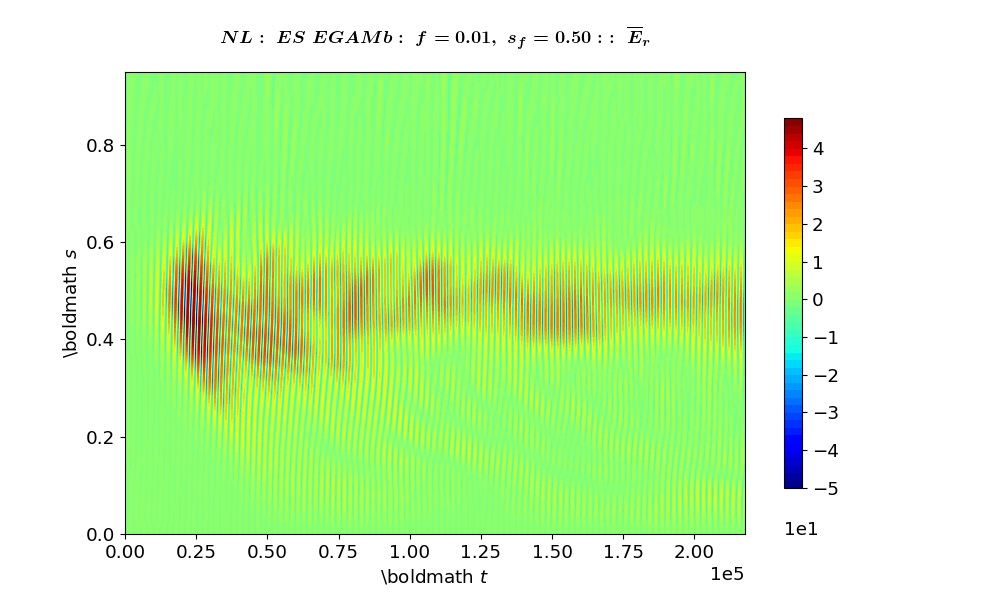

<IPython.core.display.Javascript object>


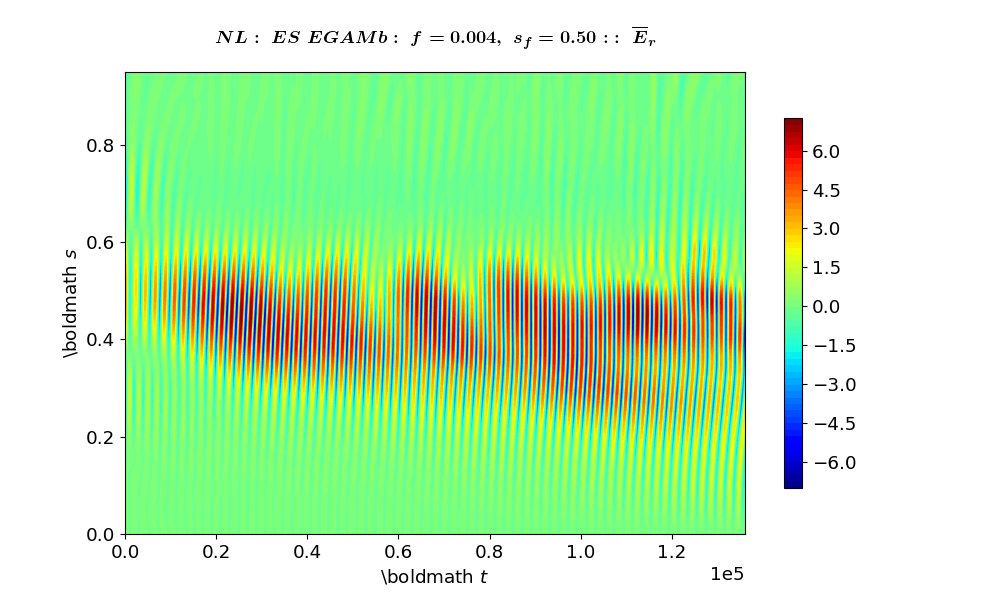

<IPython.core.display.Javascript object>


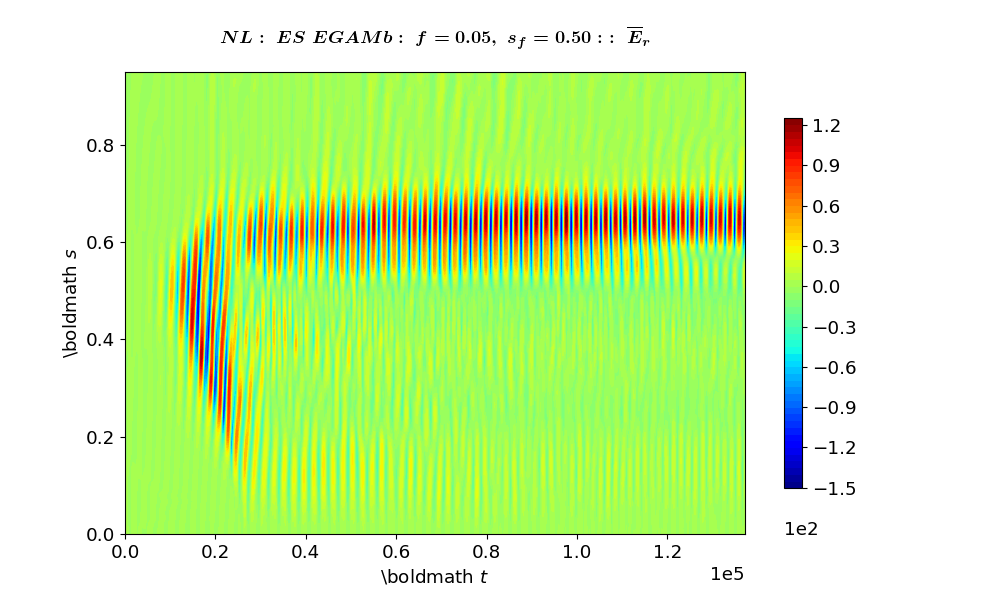

In [21]:
# **********************
# *** ZONAL along ts ***
# **********************
reload()

npr = 3

oo_ts = {
    'ovars': [
        ['zonal', 'erbar'], 
    ] * npr,
    'avrs': [
        ['ts']
    ] * npr,
    'dds': [nb025_f001, nb025_f0004, nb025_f005],
#     'var_legs1': ['\overline{E}_r:\ Full\ NL'],
#     'var_legs2': ['\overline{E}_r:\ Bulk\ WPN'],
}

oo_ts.update({
#     't_start': 3e4,
#     's_start': 0.3, 's_end': 0.8,
})

common.plot_vars_2d(oo_ts)

<IPython.core.display.Javascript object>


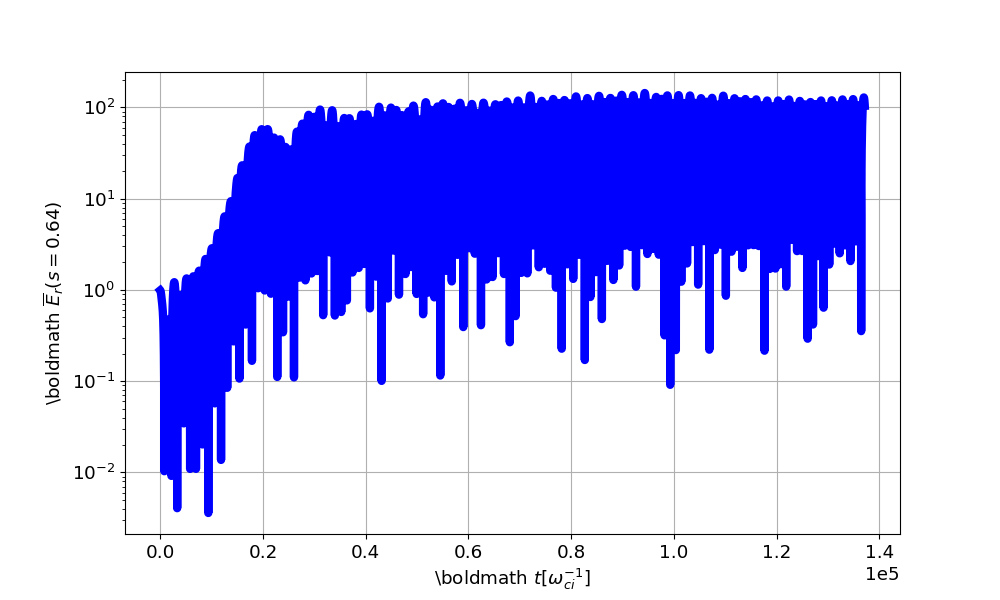

In [22]:
# ****************************
# *** ZONAL: along t at s1 ***
# ****************************
reload()

npr = 1
s1 = 0.64

oo_t_s1 = {
    'ovars': [
        ['zonal', 'erbar'],
    ] * npr,
    'avrs': [
        ['ts', 'point-s', [s1]],
    ] * npr,
    'dds': [nb025_f005],
    'flag_semilogy': True,
    'stys': ['-', ':', ':', ':'],
    'labx': 't[\omega_{ci}^{-1}]',
    'laby': '\overline{E}_r' + '(s = {:0.2f})'.format(s1),
    'var_legs1': ['Full\ NL'],
    'var_legs2': ['Bulk\ WPN'],
#     'var_legs1': ['f = 0.05'],
#     'var_legs2': ['dt=10'],
#     'x_start': 3e4,
}
common.plot_vars_1d(oo_t_s1)

<IPython.core.display.Javascript object>


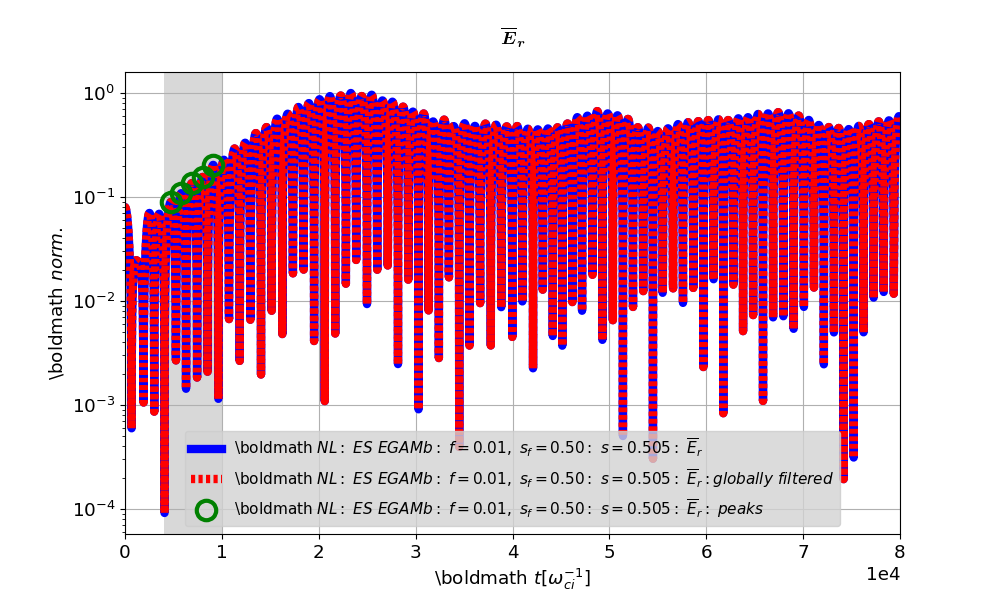

<IPython.core.display.Javascript object>


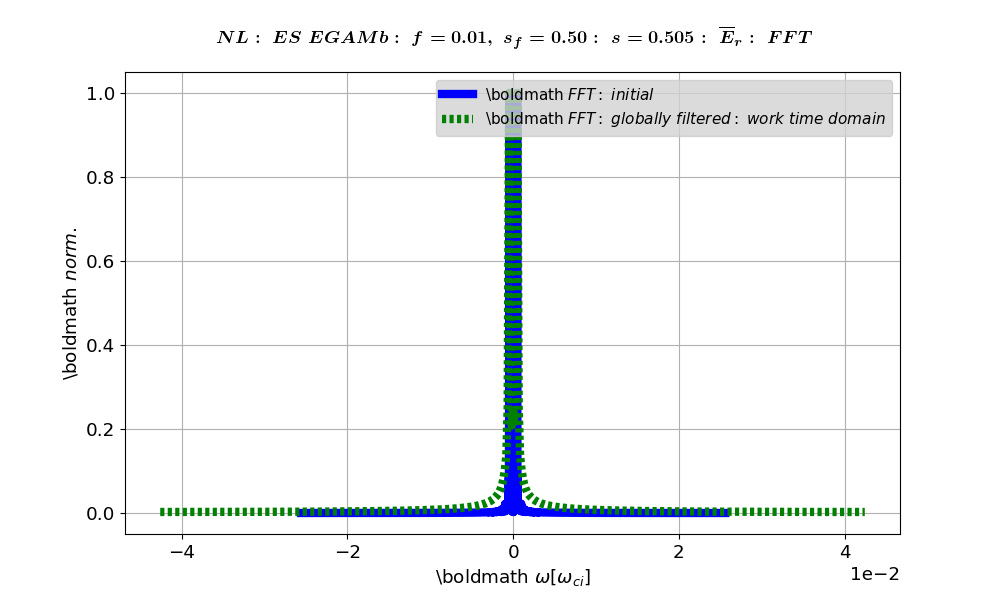

<IPython.core.display.Javascript object>


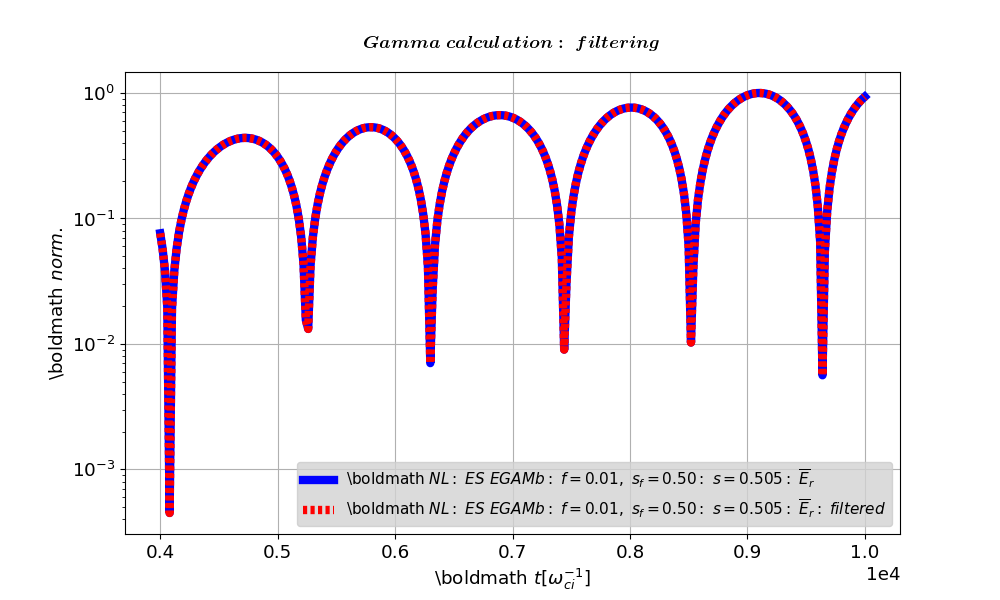

<IPython.core.display.Javascript object>


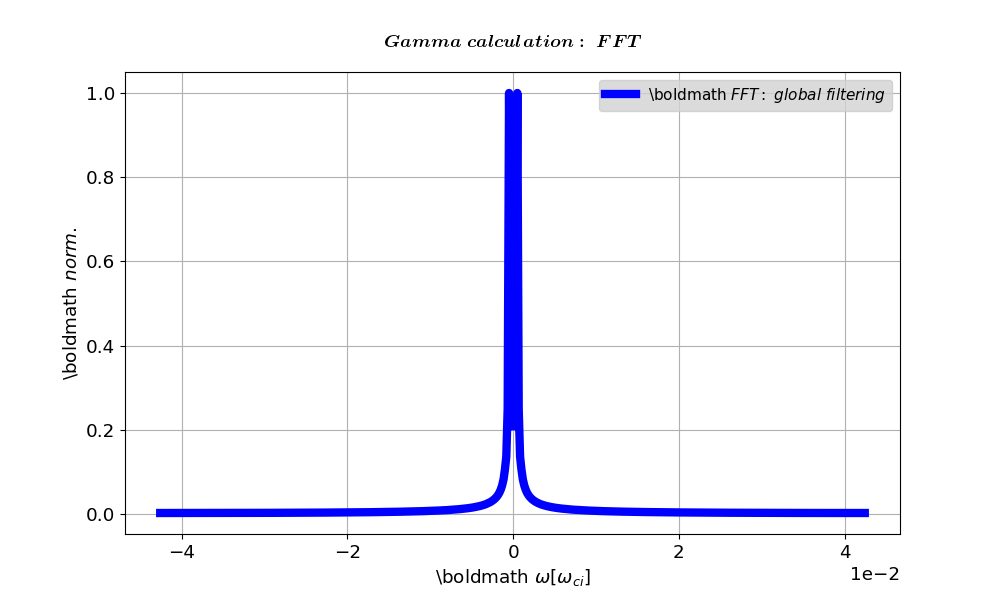

<IPython.core.display.Javascript object>


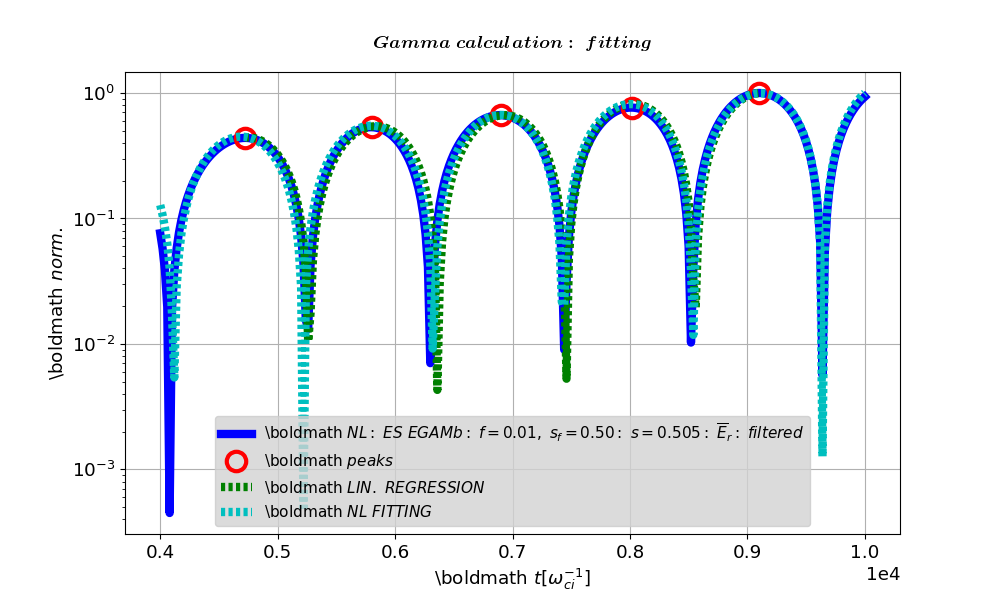

<IPython.core.display.Javascript object>


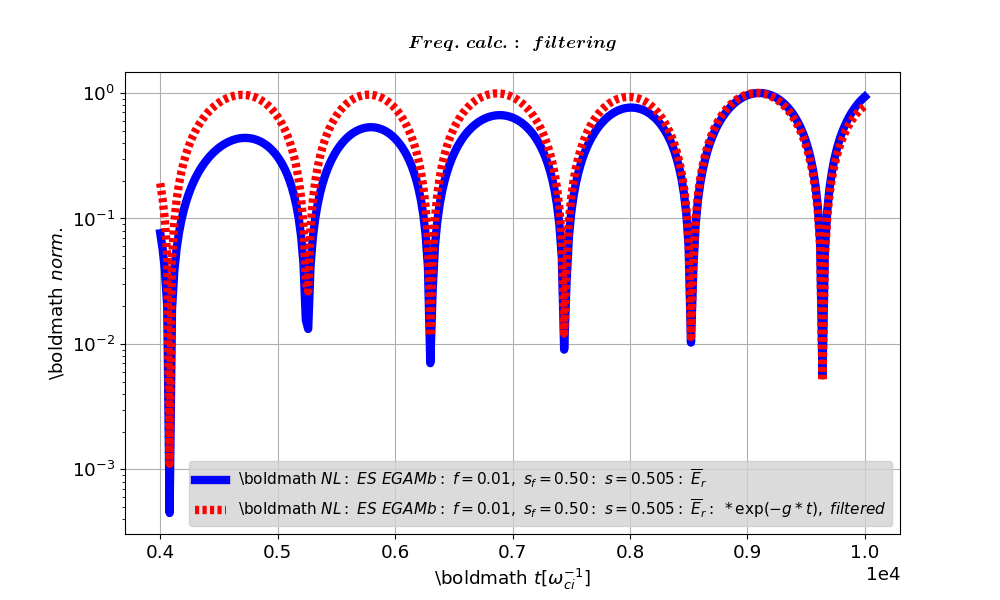

<IPython.core.display.Javascript object>


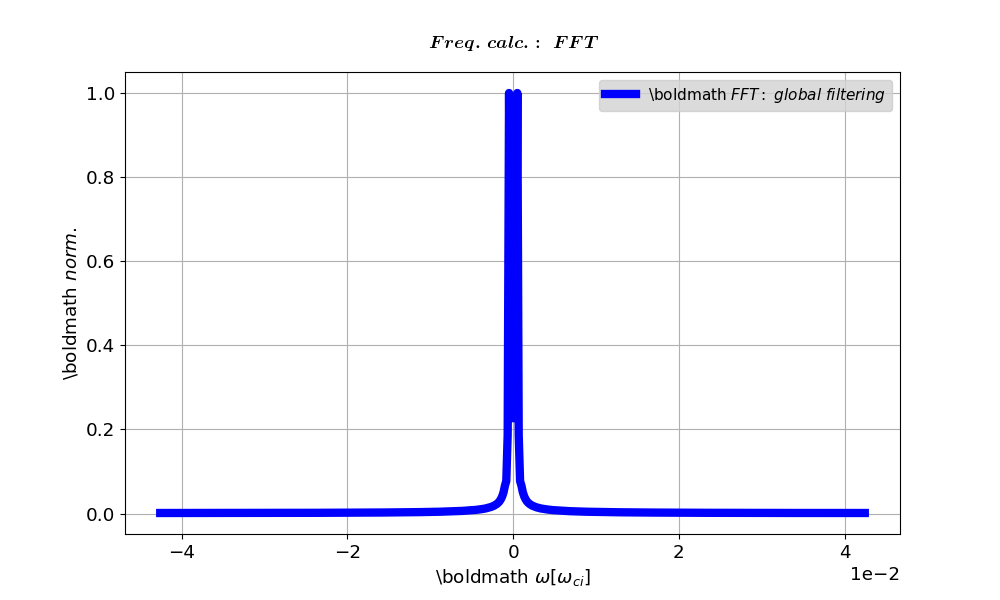

<IPython.core.display.Javascript object>


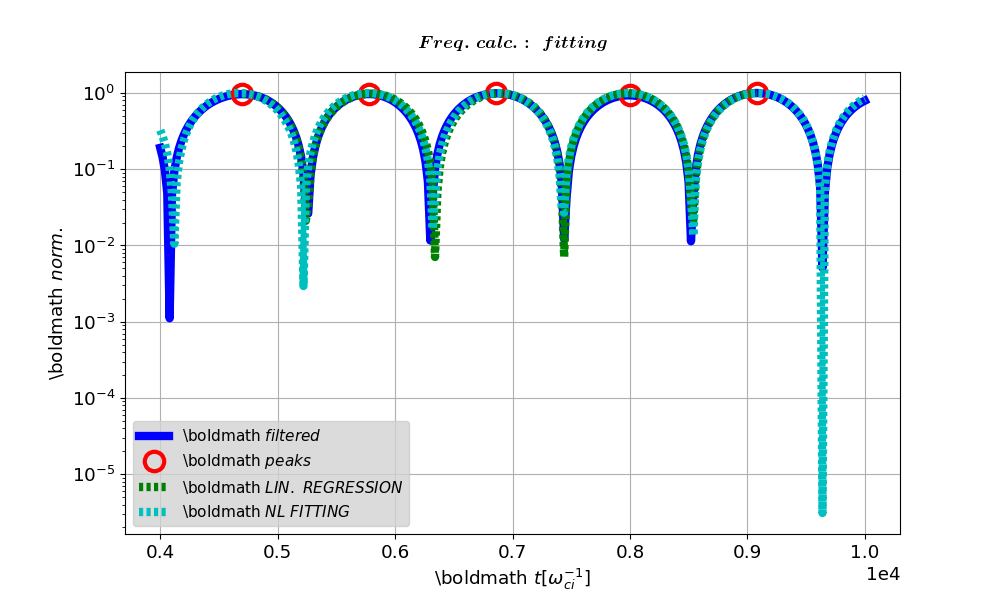

--- NAIVE CALCULATION ---
- GAMMA: ESTIMATION -
prel. w[wci] = 2.869e-03
g[wci] = 1.864e-04 +- 6.155e-05
- GAMMA: NL FITTING -
prel. w[wci] = 2.843e-03 +- 3.559e-06
g[wci] = 1.803e-04 +- 4.021e-06
- FREQUENCY: ESTIMATION -
w[wci] = 2.869e-03
(g_real - g_num)[wci] = 5.700e-06 +- 6.045e-05
- FREQUENCY: NL FITTING -
w[wci] = 2.844e-03 +- 3.778e-06
(g_real - g_num)[wci] = -4.666e-07 +- 4.327e-06
All chosen time intervals are unique.


<IPython.core.display.Javascript object>


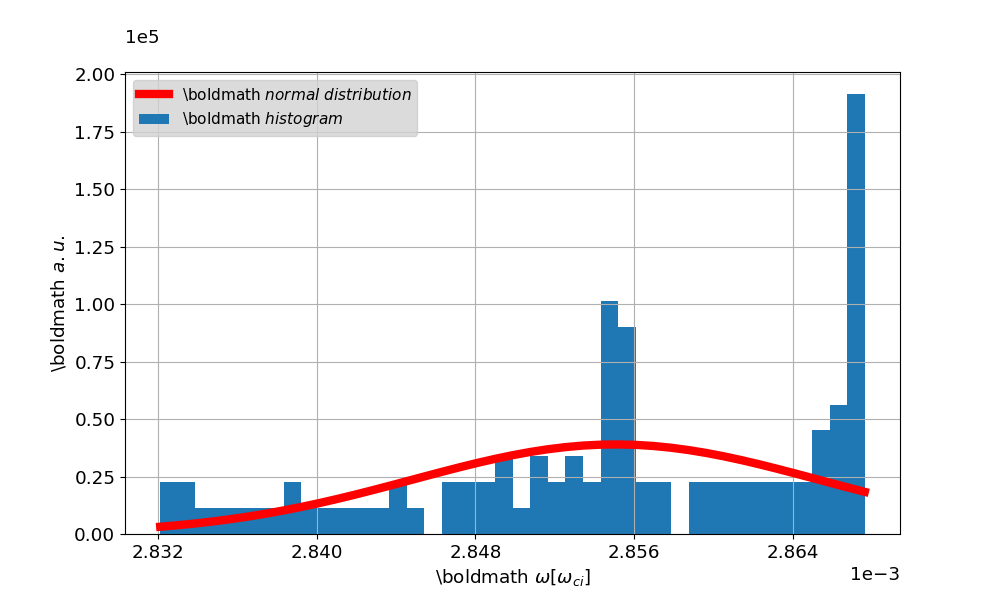

<IPython.core.display.Javascript object>


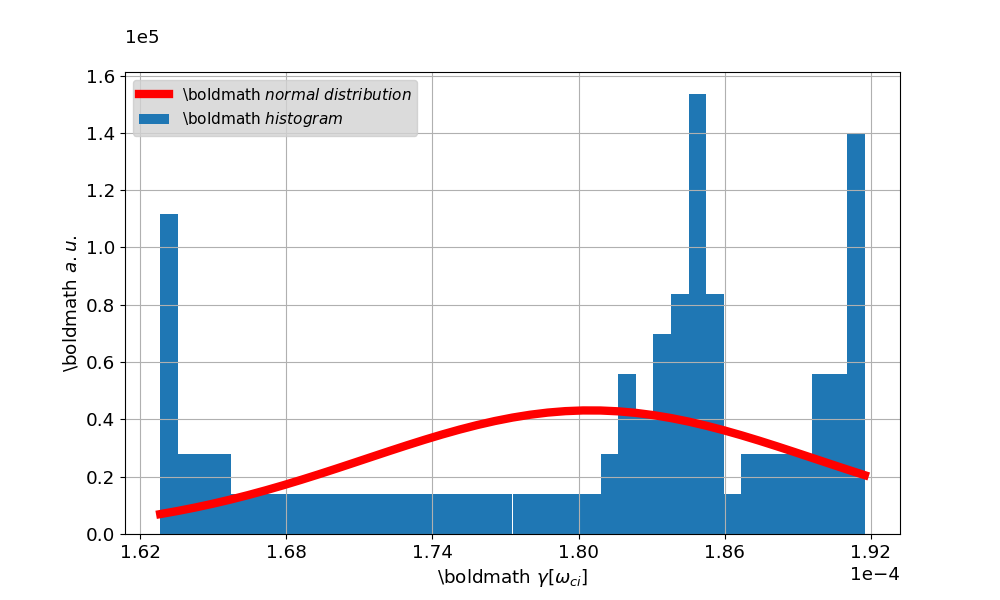

--- STATISTICS ---
number of frequency samples = 100
number of rate samples = 99
w[wci] = 2.855e-03+-2.006e-05
g[wci] = 1.805e-04+-1.812e-05


{'naive': {'w_est': 0.0028690343868399935,
  'g_est': 0.00018640274042012336,
  'w_adv': 0.0028437338424417346,
  'g_adv': 0.00018028398927582545},
 'stat': {'w': 0.002855060324656521,
  'err_w': 2.0058853614322436e-05,
  'g': 0.00018048755215169964,
  'err_g': 1.8122219491423972e-05}}

In [7]:
# ***************************************************
# *** DIRECT METHOD: FIND FRQUENCY and GAMMA (s1) ***
# ***************************************************
reload()

# --- ES EGAM ---
dd_current = dict(nb025_f001_mpr)
s1 = 0.50

tmin, tmax = 4e3, 1.0e4 
# tmin, tmax = 8e3, 1.4e4
# tmin, tmax = 1.2e4, 2.0e4
filt_global = None
min_n_peaks, threshold_w, threshold_g = 4, 0.02, 0.1
n_samples = 100

oo_var = {
    'ovars': [['zonal', 'erbar']],
    'avrs': [['ts', 'point-s', [s1]]],
    'dds': [dd_current],
#     'sel_legs1': 'woPr',
}

oo_wg = {
    # BASIC
    't_work': [tmin, tmax], 
    'sel_wg': 'wg-adv',
    'flag_two_stages': True,
    # FILTERING
    'filt_global': filt_global,
    # STATISTICS
    'flag_stat':   True,
    'n_samples':   n_samples,
    'min_n_peaks': min_n_peaks,
    'threshold_w': threshold_w,
    'threshold_g': threshold_g,
}

oo_plot = {
#     't_plot': [0.15e4, 1.5e4],
    'flag_norm': True,
    'flag_semilogy': True
}

common.calc_wg(oo_var, oo_wg, oo_plot)

Calculation: EGAMb:\ f = 0.01,\ v_{parallel,f} = 8.0
Advanced fitting with dynamic rate failed.
Advanced fitting with frequency failed.
Advanced fitting with dynamic rate failed.
Advanced fitting with frequency failed.
Advanced fitting with dynamic rate failed.
Advanced fitting with frequency failed.
Advanced fitting with dynamic rate failed.
Advanced fitting with frequency failed.
Calculation: EGAMb:\ f = 0.004\ v_{parallel,f} = 8.0
Calculation: EGAMb:\ f = 0.05\ v_{parallel,f} = 8.0


<IPython.core.display.Javascript object>


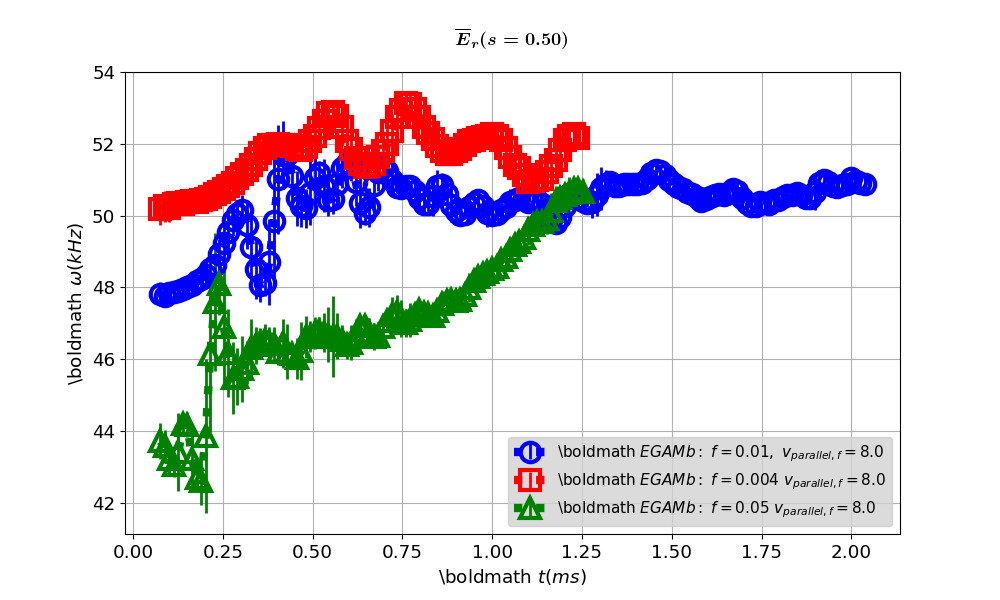

<IPython.core.display.Javascript object>


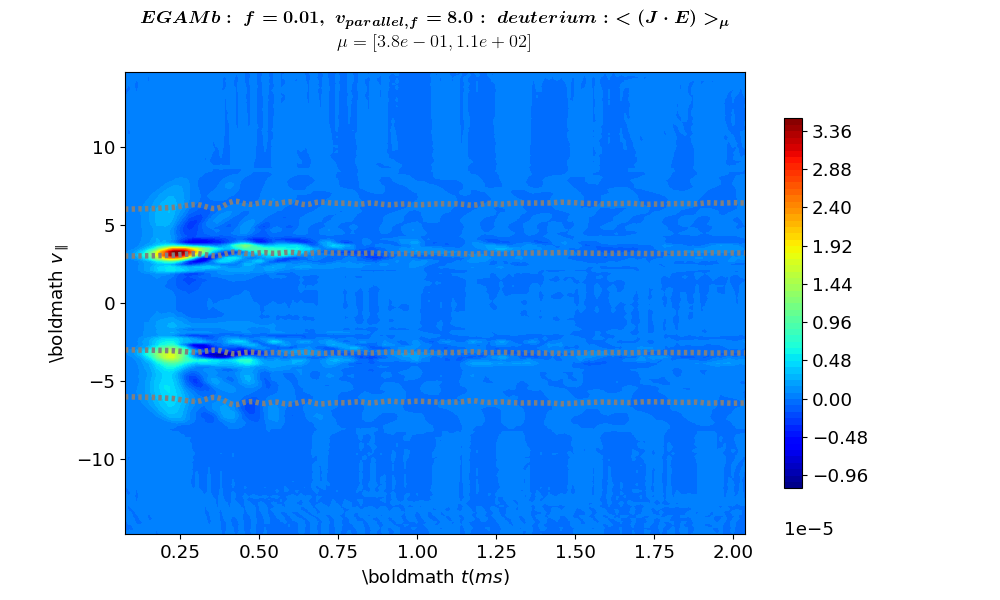

<IPython.core.display.Javascript object>


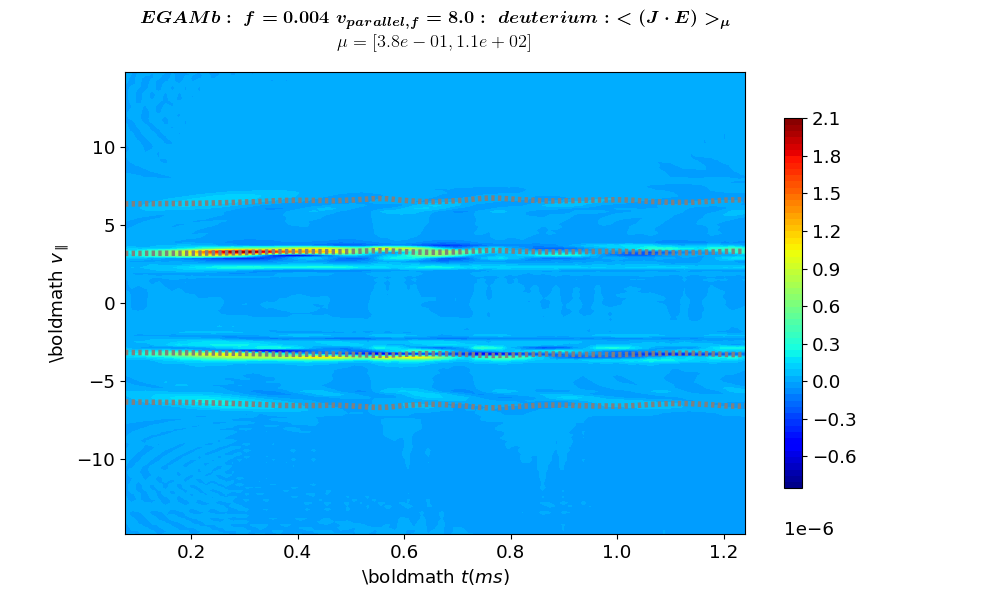

<IPython.core.display.Javascript object>


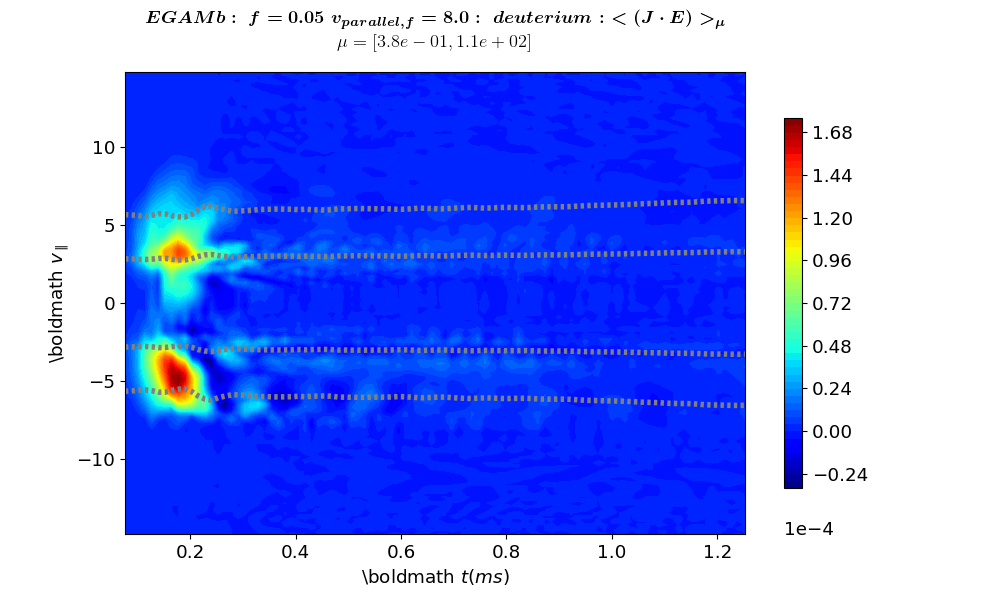

In [26]:
# *************************************************************************
# *** DIRECT METHOD: FIND FRQUENCY and GAMMA (s1) as a function of TIME ***
# *************************************************************************
reload()

dd_current, s1, tmin, tmax = dict(nb025_f001), 0.50, 4e3, 1.35e5
width_t, n_samples = 8.0e3, 100

# dd_current, s1, tmin, tmax = dict(nb025_f0004), 0.40, 4e3, 1.35e5
# width_t, n_samples = 8.0e3, 100

# dd_current, s1, tmin, tmax = dict(nb025_f005), 0.64, 4e3, 1.35e5
# width_t, n_samples = 8.0e3, 100

sel_norm_w = 'kHz'
sel_norm_t = 's'

sel_fv = 'none'  # 'deuterium_dfdv_res_t0'
sel_je = 'deuterium_je'
je_n_vpar_res_to_draw = 2

step_t = width_t/4.
min_n_peaks, threshold_w, threshold_g = 4, 0.02, 0.1
flag_inc_boundary = False
filt_global = None

oo_var_init = {
    'ovars': [['zonal', 'erbar']],
    'avrs': [['ts', 'point-s', [s1]]],
    'dds': [dd_current],
}
oo_wg_init = {
    # BASIC 
    'sel_wg': 'wg-adv',
    'flag_two_stages': True,
    # FILTERING
    'filt_global': filt_global,
    # STATISTICS
    'flag_stat':   True,
    'n_samples':   n_samples,
    'min_n_peaks': min_n_peaks,
    'threshold_w': threshold_w,
    'threshold_g': threshold_g,
}
oo_t_init = {
    'tmin': tmin, 'tmax': tmax,
    'width_t': width_t,
    'step_t': step_t,
    'sel_fv': sel_fv,
    'sel_je': sel_je,
    'je_n_vpar_res_to_draw': je_n_vpar_res_to_draw,
}
oo_plot = {
    'tit_plot': '\overline{E}_r' + '(s = {:0.2f})'.format(s1),
    'stys_plot': ['o:', 's:', '^:'],
    'sel_norm_w': sel_norm_w,
    'sel_norm_t': sel_norm_t,
#     'vpar_start': 4, 'vpar_end': 9,
#     'vpar_start': 2, 'vpar_end': 4 
}

# Create arrays of parameters
oo_vars, oo_wgs, oo_ts, conf_names = [], [], [], []

def new_conf(name, oo_vars, oo_wgs, oo_ts, conf_names):
    conf_names.append(name)
    oo_ts.append(dict(oo_t_init))
    oo_vars.append(dict(oo_var_init))
    oo_wgs.append(dict(oo_wg_init))
    
    return oo_ts[-1], oo_vars[-1], oo_wgs[-1]

# - 1st configuration -
name_conf = 'EGAMb:\ f = 0.01,\ v_{parallel,f} = 8.0'
oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)

# - 2nd configuration -
name_conf = 'EGAMb:\ f = 0.004\ v_{parallel,f} = 8.0'
oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)
oo_var_current.update({
    'dds': [nb025_f0004],
    'avrs': [['ts', 'point-s', [0.40]]]
})
oo_t_current.update({
    'tmin': 4e3, 'tmax': 1.35e5,
})

# - 3rd configuration -
name_conf = 'EGAMb:\ f = 0.05\ v_{parallel,f} = 8.0'
oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)
oo_var_current.update({
    'dds': [nb025_f005],
    'avrs': [['ts', 'point-s', [0.64]]]
})
oo_t_current.update({
    'tmin': 4e3, 'tmax': 1.37e5,
})

# # - 2nd configuration -
# name_conf = 'EGAMb:\ wave-EP\ NL'
# oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)
# oo_var_current.update({'dds': [nb025_f001_mpr_wp]})

# # - 2nd configuration -
# name_conf = 'EGAMm:\ N=1e8'
# oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)
# oo_var_current.update({'dds': [nm025_f001_N1e8]})

# # - 3rd configuration -
# name_conf = 'EGAMm:\ dt=10'
# oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)
# oo_var_current.update({'dds': [nm025_f001_dt10]})

# # - 4th configuration -
# name_conf = 'EGAMm:\ ns=256'
# oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)
# oo_var_current.update({'dds': [nm025_f001_ns256]})

# # ---
# # - 2nd configuration -
# name_conf = 'EGAMb:\ s = 0.35'
# oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)

# oo_var_current.update({ 'avrs': [['ts', 'point-s', [0.35]]] })

# # ---
# # - 3rd configuration -
# name_conf = 'EGAMb:\ s = 0.25'
# oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)

# oo_var_current.update({ 'avrs': [['ts', 'point-s', [0.25]]] })

# # ---
# # - 2nt configuration -
# name_conf = 'EGAMm'
# oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)

# dd_current2 = dict(nm025_f001_mpr)
# width_t, n_samples = 6e3, 80
# step_t = width_t/2

# oo_t_current.update({'width_t': width_t, 'step_t': step_t})
# oo_wg_current.update({'n_samples': n_samples})
# oo_var_current.update({'dds': [dd_current2]})

# ---
# -- SET of configurations --
oo_wg_t = {
    'conf_names': conf_names,
    'oo_ts':   oo_ts,
    'oo_vars': oo_vars,
    'oo_wgs':  oo_wgs,
}

# Calculation
common.calc_wg_t(oo_wg_t, oo_plot)

<IPython.core.display.Javascript object>


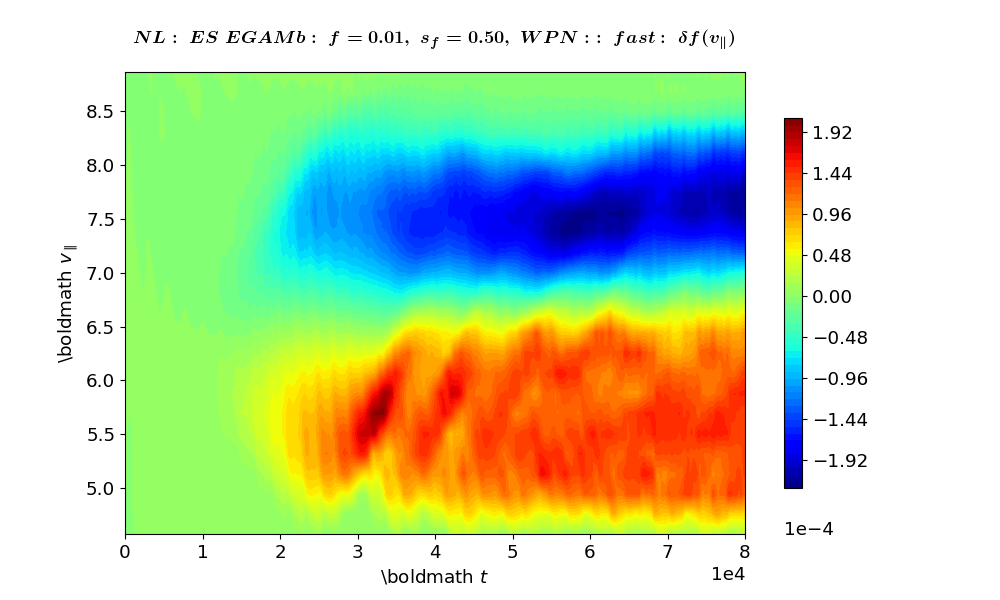

<IPython.core.display.Javascript object>


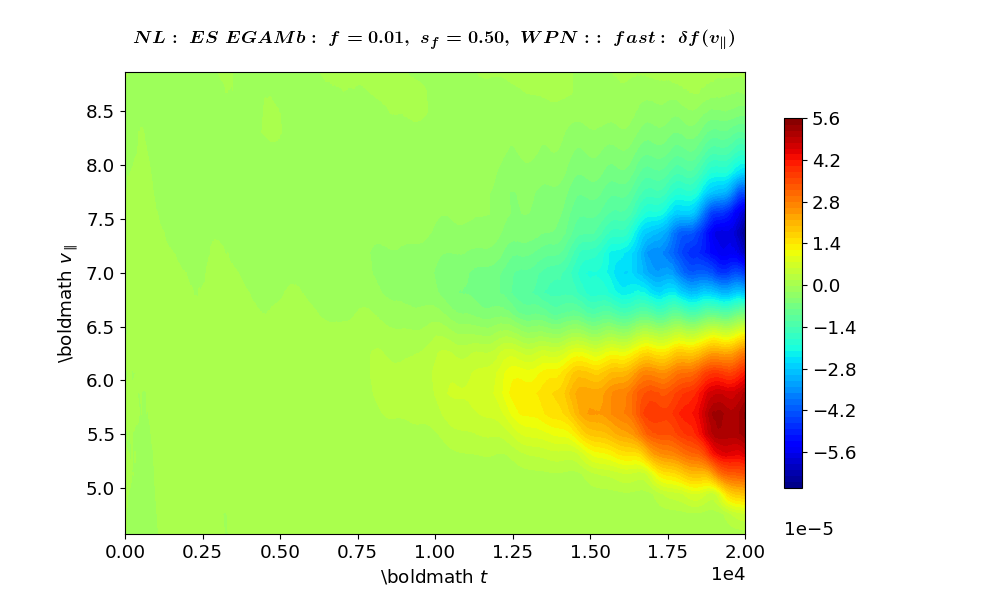

In [8]:
# *****************************
# *** DISTRIBUTION (t,vpar) ***
# *****************************
reload()

npr = 1

oo_tvpar = {
    'ovars': [
        ['distribution', 'df_vel_1d', 'fast'], 
    ] * npr,
    'avrs': [
        ['tvpar']
    ] * npr,
    'dds': [nb025_f001],
}

oo_tvpar.update({
#      't_start': 3e4,
     'vpar_start': 4.5, 'vpar_end': 9.0,
})
common.plot_vars_2d(oo_tvpar)

# oo_tvpar.update({
#      't_end': 2e4,
#      'vpar_start': 4.5, 'vpar_end': 9.0,
# })
# common.plot_vars_2d(oo_tvpar)

<IPython.core.display.Javascript object>


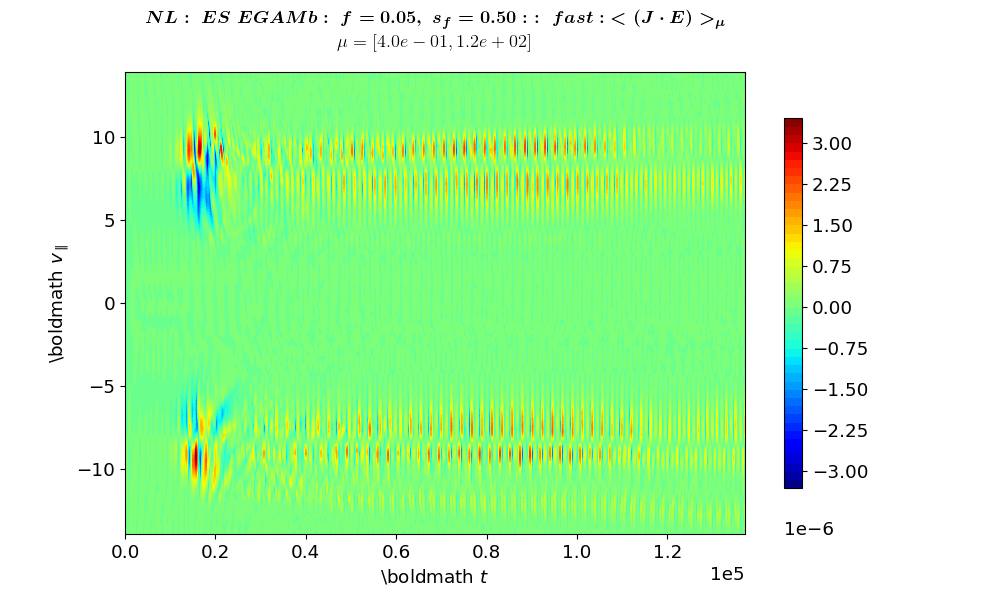

In [24]:
# *****************************
# *** MPR (t,vpar) ***
# *****************************
reload()

npr = 1

oo_tvpar = {
    'ovars': [
        ['mpr', 'je', 'fast'], 
    ] * npr,
    'avrs': [
        ['tvpar']
    ] * npr,
    'dds': [nb025_f005],
}

oo_tvpar.update({
# #      't_start': 3e4,
#      'vpar_start': 4.5, 'vpar_end': 9.0,
})
common.plot_vars_2d(oo_tvpar)

# oo_tvpar.update({
#      't_end': 2e4,
#      'vpar_start': 4.5, 'vpar_end': 9.0,
# })
# common.plot_vars_2d(oo_tvpar)

<IPython.core.display.Javascript object>


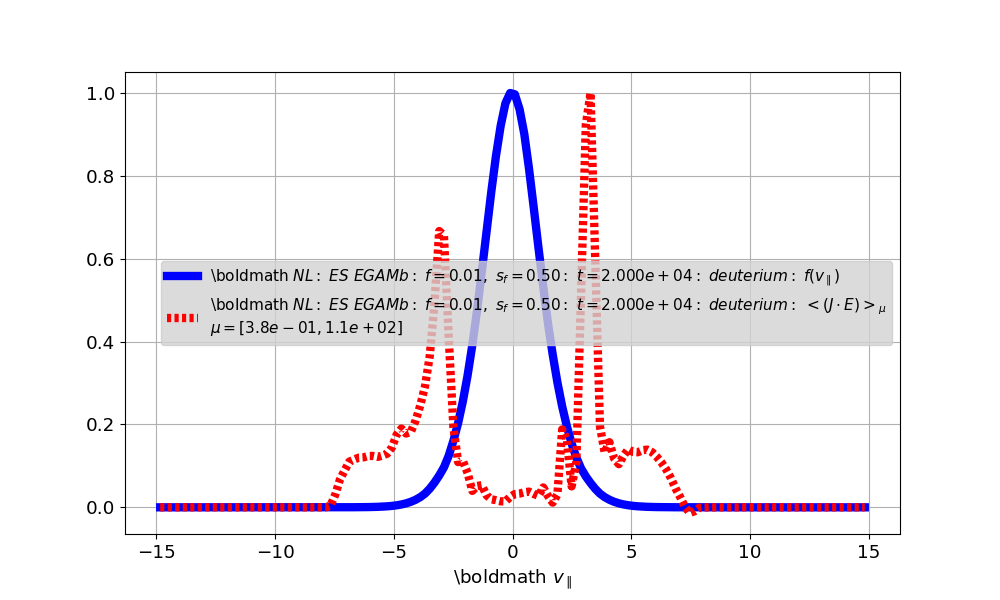

In [16]:
# *********************************
# *** DISTRIBUTION (vpar) at t1 ***
# *********************************
reload()

species_name = 'deuterium'
t_points = [2e4]

oo_vpar_t1 = {
    'ovars': [
        ['distribution', 'f_vel_1d', species_name], 
        ['mpr', 'je', 'deuterium'],
    ],
    'avrs': [
        ['tvpar', 'point-t', t_points]
    ] * 2,
    'dds': [nb025_f001_mpr] * 2,
    'stys': ['-', ':', ':', ':', ':', ':', ':'],
    'labx': 'v_{\parallel}',
    'flag_norm': True,
}
common.plot_vars_1d(oo_vpar_t1)